# Clasificación

<div style="text-align: right"><a>por </a><a href="https://www.linkedin.com/in/sheriff-data/" target="_blank">Manuel López Sheriff</a></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#1-predictor" data-toc-modified-id="1-predictor-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1 predictor</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Accuracy score</a></span></li></ul></li><li><span><a href="#Many-predictors" data-toc-modified-id="Many-predictors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Many predictors</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Accuracy score</a></span></li><li><span><a href="#predict_proba" data-toc-modified-id="predict_proba-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span><code>predict_proba</code></a></span></li><li><span><a href="#Elegir-manualmente-el-umbral" data-toc-modified-id="Elegir-manualmente-el-umbral-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Elegir manualmente el umbral</a></span></li></ul></li><li><span><a href="#Las-matemáticas-de-la-regresión-logística" data-toc-modified-id="Las-matemáticas-de-la-regresión-logística-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Las matemáticas de la regresión logística</a></span></li></ul></li><li><span><a href="#Métricas" data-toc-modified-id="Métricas-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Métricas</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#F1-score" data-toc-modified-id="F1-score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>F1 score</a></span></li><li><span><a href="#F_beta-score" data-toc-modified-id="F_beta-score-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>F_beta score</a></span></li></ul></li><li><span><a href="#Choosing-the-best-threshold" data-toc-modified-id="Choosing-the-best-threshold-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choosing the best threshold</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

Recuerda:

Los modelos de regresión se utilizan cuando la variable objetivo es **cuantitativa**:
 - salarios
 - emisiones de gases
 - edad de una persona en una foto
 - ...

Los modelos de clasificación se utilizan cuando la variable objetivo es **cualitativa**:
 - sobrevivir (o no) al Titanic
 - devolver (o no) un préstamo
 - identificar si  hay (o no) a un perro en una foto
 - decidir cuál de 3 especies de plantas es ésta
 - ...

Las métricas son especialmente importantes en los problemas de clasificación.

Debemos comprender el objetivo del caso de uso para elegir la métrica adecuada.

## Data exploration

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4.5, 3]

In [3]:
df = pd.read_csv("./datasets/breast_cancer_bis.csv")

In [4]:
df.shape

(569, 8)

In [5]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,is_cancer
0,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,1
1,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0
2,14.220,23.12,94.37,609.9,0.10750,0.24130,0.19810,1
3,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0
4,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0


In [6]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity', 'is_cancer'],
      dtype='object')

Documentation:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

La variable a predecir es `is_cancer`  
Es una variable categórica, que toma los valores $0$ o $1$

In [7]:
df.is_cancer.value_counts()

is_cancer
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='is_cancer', ylabel='count'>

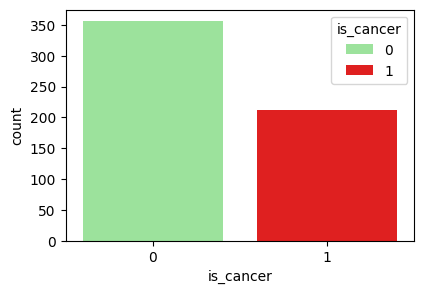

In [8]:
sns.countplot(x=df.is_cancer, hue=df.is_cancer, palette=["lightgreen", "red"])

In [9]:
import numpy as np

In [10]:
df.sample(5).sort_values("mean_radius")

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,is_cancer
94,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0
227,11.360,17.57,72.49,399.8,0.08858,0.05313,0.02783,0
27,14.260,19.65,97.83,629.9,0.07837,0.22330,0.30030,0
362,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,1
493,15.780,22.91,105.70,782.6,0.11550,0.17520,0.21330,1


In [11]:
df.mean_radius.quantile(0.50)

13.37

In [12]:
df.mean_radius.quantile(0.90)

19.53

In [13]:
df.mean_radius.quantile(np.arange(0, 1.1, 0.25)).round(1)

0.00     7.0
0.25    11.7
0.50    13.4
0.75    15.8
1.00    28.1
Name: mean_radius, dtype: float64

In [14]:
df.mean_radius.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean_radius, dtype: float64

In [15]:
import matplotlib.pyplot as plt

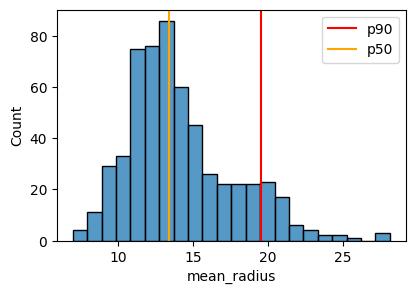

In [16]:
sns.histplot(x=df.mean_radius)
plt.axvline(df.mean_radius.quantile(0.90), label="p90", color="red")
plt.axvline(df.mean_radius.quantile(0.50), label="p50", color="orange")
# plt.axvline(df.mean_radius.mean(), label="mean", color="green")

plt.legend()

<Axes: xlabel='mean_radius', ylabel='Count'>

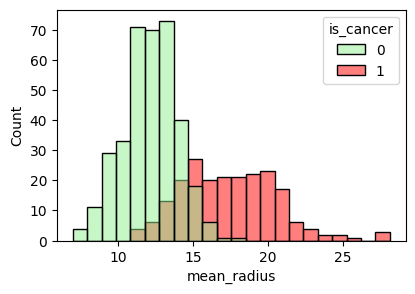

In [17]:
sns.histplot(x=df.mean_radius, hue=df.is_cancer, palette=["lightgreen", "red"])

<Axes: xlabel='mean_radius', ylabel='Density'>

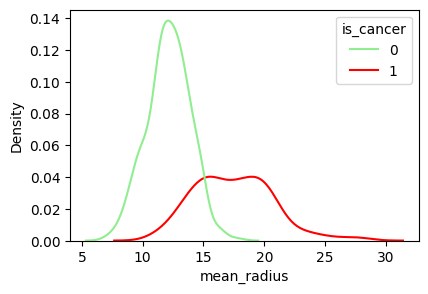

In [18]:
sns.kdeplot(x=df.mean_radius, hue=df.is_cancer, palette=["lightgreen", "red"])

<Axes: xlabel='mean_area', ylabel='Density'>

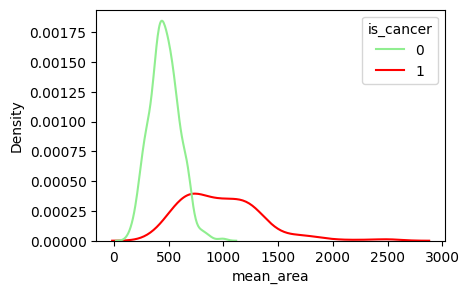

In [19]:
sns.kdeplot(x=df.mean_area, hue=df.is_cancer, palette=["lightgreen", "red"])

<Axes: xlabel='mean_radius', ylabel='mean_smoothness'>

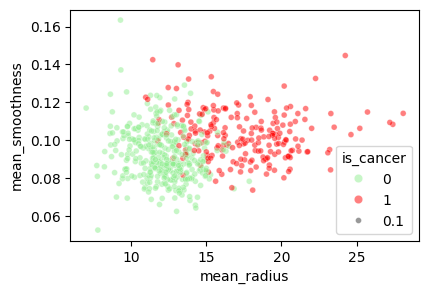

In [20]:
sns.scatterplot(x=df.mean_radius, y=df.mean_smoothness, hue=df.is_cancer, palette=["lightgreen", "red"], size=0.1, alpha=0.5)

## Logistic regression

La regresión logística es el algoritmo de clasificación más simple

### 1 predictor

#### Model

Tratemos de predecir `is_cancer` usando sólo como predictor `mean_radius`

<Axes: xlabel='mean_radius', ylabel='is_cancer'>

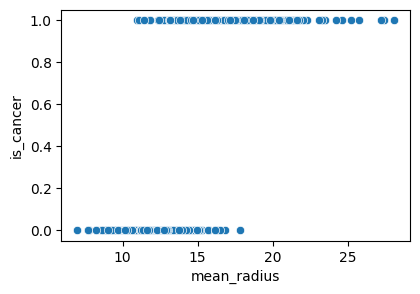

In [21]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)

In [22]:
df2 = df[["mean_radius", "is_cancer"]].copy()

In [23]:
df2.head()

,mean_radius,is_cancer
0,17.910,1
1,10.260,0
2,14.220,1
3,9.755,0
4,9.738,0


In [24]:
df2.sample(5).sort_values("mean_radius")

,mean_radius,is_cancer
377,10.80,0
408,11.20,0
407,12.34,1
84,12.75,0
283,15.70,1


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
type(log)

sklearn.linear_model._logistic.LogisticRegression

In [28]:
df2.shape

(569, 2)

In [29]:
df2.head()

,mean_radius,is_cancer
0,17.910,1
1,10.260,0
2,14.220,1
3,9.755,0
4,9.738,0


In [30]:
log.fit(
    X=df2[["mean_radius"]],
    y=df2.is_cancer
)

LogisticRegression()

Un model entrenado es una _máquina de hacer predicciones_

Qué tal habría predicho a los 5 primeros pacientes?

In [31]:
df2.head()

,mean_radius,is_cancer
0,17.910,1
1,10.260,0
2,14.220,1
3,9.755,0
4,9.738,0


In [32]:
log.predict(df2[["mean_radius"]])[:5]

array([1, 0, 0, 0, 0])

In [33]:
df2["prediction_cancer"] = log.predict(df2[["mean_radius"]])

In [34]:
df2.sample(10)

,mean_radius,is_cancer,prediction_cancer
146,11.06,0,0
308,18.81,1,1
274,13.44,1,0
178,12.72,0,0
126,12.58,0,0
362,14.48,1,0
552,12.32,0,0
442,19.89,1,1
263,24.63,1,1
455,14.11,0,0


#### Accuracy score

Cuántas predicciones fueron correctas?

In [35]:
df2.head()

,mean_radius,is_cancer,prediction_cancer
0,17.910,1,1
1,10.260,0,0
2,14.220,1,0
3,9.755,0,0
4,9.738,0,0


In [36]:
df2["is_correct"] = df2.is_cancer == df2.prediction_cancer

In [37]:
df2.sample(10)

,mean_radius,is_cancer,prediction_cancer,is_correct
85,12.890,0,0,True
196,11.930,0,0,True
465,14.440,0,0,True
46,16.460,1,1,True
102,12.060,0,0,True
163,19.270,1,1,True
443,9.173,0,0,True
478,21.610,1,1,True
434,17.010,1,1,True
38,12.830,1,0,False


Accuracy es la proporción de predicciones buenas

In [38]:
accuracy = df2.is_correct.sum() / df2.shape[0]

In [39]:
round(accuracy, 3)

0.879

In [40]:
round(df2.is_correct.mean(), 3)

0.879

Hagamos lo mismo con el train / test split (como deberíamos hacer siempre)

In [41]:
X = df2[["mean_radius"]]
y = df2.is_cancer

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=466)

In [44]:
df2.head()

,mean_radius,is_cancer,prediction_cancer,is_correct
0,17.910,1,1,True
1,10.260,0,0,True
2,14.220,1,0,False
3,9.755,0,0,True
4,9.738,0,0,True


In [45]:
df2.shape

(569, 4)

In [46]:
X_train.shape, X_test.shape

((455, 1), (114, 1))

In [47]:
log = LogisticRegression()

In [48]:
log.fit(
    X_train, 
    y_train
)

LogisticRegression()

In [49]:
X_test[:5]

,mean_radius
556,11.75
560,16.16
231,17.46
134,15.37
0,17.91


In [50]:
y_test[:5]

556    0
560    1
231    1
134    1
0      1
Name: is_cancer, dtype: int64

In [51]:
log.predict(X_test)[:5]

array([0, 1, 1, 1, 1])

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
# test score
round(accuracy_score(y_test, log.predict(X_test)), 4)

0.807

In [54]:
# train score
round(accuracy_score(y_train, log.predict(X_train)), 4)

0.8879

In [55]:
from sklearn.model_selection import cross_validate

Veamos los resultados con 5 folds de cross validation

In [56]:
cv_results = cross_validate(LogisticRegression(), X, y, cv=5, return_train_score=True)

In [57]:
pd.DataFrame(cv_results).round(3)

,fit_time,score_time,test_score,train_score
0,0.008,0.002,0.868,0.881
1,0.004,0.001,0.912,0.870
2,0.003,0.002,0.816,0.892
3,0.003,0.001,0.895,0.875
4,0.003,0.001,0.894,0.879


`train_score` no suele ser mejor que `test_score`

In [58]:
cv_results.get("test_score").mean().round(3)

0.877

Cuántos True/False Positives/Negatives tenemos?

Construimos la matriz de confusión

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [59]:
df2.head(10)

,mean_radius,is_cancer,prediction_cancer,is_correct
0,17.910,1,1,True
1,10.260,0,0,True
2,14.220,1,0,False
3,9.755,0,0,True
4,9.738,0,0,True
5,11.130,0,0,True
6,10.800,0,0,True
7,13.030,0,0,True
8,12.060,0,0,True
9,20.730,1,1,True


In [60]:
titanic = pd.read_csv("./datasets/titanic.csv")

In [61]:
pd.crosstab(
    titanic.Pclass,
    titanic.Survived
)

Survived,0,1
Pclass,,
1,123,200
2,158,119
3,528,181


In [62]:
df2.head()

,mean_radius,is_cancer,prediction_cancer,is_correct
0,17.910,1,1,True
1,10.260,0,0,True
2,14.220,1,0,False
3,9.755,0,0,True
4,9.738,0,0,True


In [63]:
pd.crosstab(
    df2.is_cancer,
    df2.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,333,24
1,45,167


In [64]:
(333 + 167) / (333 + 24 + 45 + 167)

0.8787346221441125

In [65]:
import numpy as np

Ahora vamos a entender qué hizo el modelo

In [66]:
x = np.linspace(df.mean_radius.min(), df.mean_radius.max(), 100)

In [67]:
y = log.predict(x.reshape(-1, 1))

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [68]:
import matplotlib.pyplot as plt

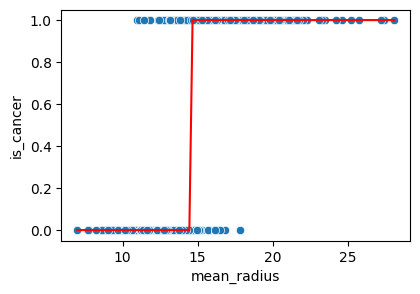

In [69]:
sns.scatterplot(x=df.mean_radius, y=df.is_cancer)
plt.plot(x, y, c= "red")

### Many predictors

#### Model

Usamos todas las variables **excepto** `is_cancer` para intentar predecir `is_cancer`

In [70]:
df3 = df.copy()

In [71]:
X = df3.drop("is_cancer", axis=1)
y = df3.is_cancer

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=466)

In [73]:
X_train.shape, X_test.shape

((455, 7), (114, 7))

In [74]:
# if no max_iter, convergence problems arise (python warns you)
log = LogisticRegression(max_iter=20000)

In [75]:
log.fit(
    X_train, 
    y_train
)

LogisticRegression(max_iter=20000)

In [76]:
X_test[:5]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity
556,11.75,20.18,76.1,419.8,0.10890,0.1141,0.06843
560,16.16,21.54,106.2,809.8,0.10080,0.1284,0.10430
231,17.46,39.28,113.4,920.6,0.09812,0.1298,0.14170
134,15.37,22.76,100.2,728.2,0.09200,0.1036,0.11220
0,17.91,21.02,124.4,994.0,0.12300,0.2576,0.31890


In [77]:
y_test[:5]

556    0
560    1
231    1
134    1
0      1
Name: is_cancer, dtype: int64

In [78]:
log.predict(X_test)[:5]

array([0, 1, 1, 1, 1])

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
# test score
round(accuracy_score(y_test, log.predict(X_test)), 4)

0.8772

In [81]:
# train score
round(accuracy_score(y_train, log.predict(X_train)), 4)

0.9231

Más predictores -> mejor test score

Olvidémonos por el momento del train / test y tomemos todo el dataset X, y para entrenar y predecir

In [82]:
# if no max_iter, convergence problems arise (python warns you)
log = LogisticRegression(max_iter=20000)

In [83]:
log.fit(X, y)

LogisticRegression(max_iter=20000)

In [84]:
df3["prediction_cancer"] = log.predict(X)

In [85]:
df3b = df3[["is_cancer", "prediction_cancer"]].copy()

In [86]:
df3b["correct"] = (df3b.is_cancer == df3.prediction_cancer)

In [87]:
# accuracy
df3b.correct.mean()

0.9121265377855887

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [88]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


#### Accuracy score

In [89]:
acc = (337 + 182) / df3.shape[0]

In [90]:
round(acc, 3)

0.912

Conseguimos mayor accuracy utilizando muchos predictores en lugar de uno (como era de esperar!)

#### `predict_proba`

En realidad, la Regresión Logística predice probabilidades

Nosotros, como data scientists, queremos información más precisa (si es posible) que la predicción *discreta* 0, 1

In [91]:
df.iloc[35:40]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,is_cancer
35,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0
36,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0
37,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0
38,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,1
39,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0


In [92]:
log.predict(X[35:40])

array([0, 0, 1, 1, 0])

In [96]:
log.predict_proba(X[35:40]).round(3)[:, 1]

array([0.024, 0.032, 0.682, 0.529, 0.065])

In [97]:
df3["prediction_proba_cancer"] = log.predict_proba(X)[:, 1]

In [98]:
df3b["prediction_proba_cancer"] = df3.prediction_proba_cancer

In [99]:
df3b

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,0.999796
1,0,0,True,0.001066
2,1,1,True,0.859037
3,0,0,True,0.013456
4,0,0,True,0.000273
...,...,...,...,...
564,0,0,True,0.094471
565,0,0,True,0.004005
566,1,1,True,0.614767
567,1,1,True,0.949577


<Axes: xlabel='prediction_proba_cancer', ylabel='Count'>

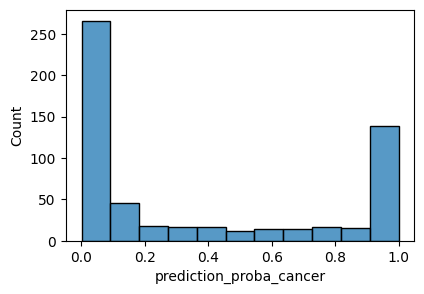

In [100]:
sns.histplot(df3b.prediction_proba_cancer)

In [105]:
df3b.sample(10)

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
212,1,1,True,0.997000
147,1,1,True,0.977922
294,0,0,True,0.000200
564,0,0,True,0.094471
248,0,1,False,0.558253
115,0,0,True,0.010842
513,0,0,True,0.002333
184,1,1,True,0.992045
459,0,0,True,0.005777
541,0,0,True,0.143746


Interpretación gráfica en el caso de UN PREDICTOR

La curva muestra la probabilidad (Y) de cáncer dado el `mean_radius` (X)

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

#### Elegir manualmente el umbral

Por defecto, `predict` computa `predict_proba` > 0.5

In [106]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,0.999796
1,0,0,True,0.001066
2,1,1,True,0.859037
3,0,0,True,0.013456
4,0,0,True,0.000273


In [107]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


Cambiemos el umbral y veamos cómo cambian los resultados

Umbral = 0.1 _invitará_ a las predicciones a ser Positivas

Subirán los Falsos positivos?
Subirán los Falsos negativos?

**Ejemplo 1: umbral bajo**

In [108]:
threshold = 0.1

In [109]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,267,90
1,6,206


In [110]:
accu = (267 + 206) / df.shape[0]

In [111]:
round(accu, 3)

0.831

Se encontraron casi todos los positivos (**recall** alto)

Aparecieron falsos positivos (**precisión** baja)

**Ejemplo 2: umbral alto**

Recordemos umbral 0.5

In [112]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


In [113]:
threshold = 0.8

In [114]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_proba_cancer > threshold
)

prediction_proba_cancer,False,True
is_cancer,,
0,353,4
1,58,154


Casi todos las predicciones positivas son ciertas (**precisión** alta)

Predecimos 58 verdaderos cáncer como Falsos (**recall** bajo)

### Las matemáticas de la regresión logística

La función logística es una función matemática definida como:
$$\sigma(z)=\frac{1}{1 + e^{-z}}$$

$e^{-z}=\frac{1}{e^z}$

**Ejercicio**: 
 * $\sigma(0)= 0.5$

 * $\lim_{z \rightarrow \infty} \sigma(z)=1$

 * $\lim_{z \rightarrow -\infty} \sigma(z)=0$

In [115]:
z = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-z))

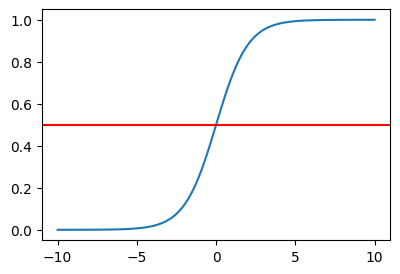

In [126]:
plt.plot(z, sigma, "-")
plt.axhline(0.5, color="red")

La función logística es una función matemática definida como:
$$\sigma(z)=\frac{1}{1 + e^{-z}}$$

**Ejercicio**: $$\sigma'(z)=\sigma(z)(1-\sigma(z))$$

<img width=300 src="https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-507e60eb67497bbef9f09a82bc205da1_l3.svg">

In [127]:
log.coef_

array([[-2.72895711,  0.22625078,  0.62577076, -0.00455977,  0.49087983,
         0.80494872,  1.44401701]])

In [128]:
pd.Series(log.coef_[0], index=X.columns).head()

mean_radius       -2.728957
mean_texture       0.226251
mean_perimeter     0.625771
mean_area         -0.004560
mean_smoothness    0.490880
dtype: float64

La regresión logística encuentra los parámetros $\beta_0$, ..., $\beta_n$ **óptimos** de forma que: 
$$\hat{y}=\sigma(\beta _{0}+\beta _{1}x_1 + ... + \beta_n x_n)=\frac{1}{1 + e^{-(\beta _{0}+\beta _{1}x_1 + ... + \beta_n x_n)}}$$ tenga el menor error

Relacionado con la cross-entropy

## Métricas

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

OJO:

 - la métrica debe elegirse a-priori, con conocimiento del problema. A continuación, se entrenan varios modelos y se elige el que obtiene el mejor resultado
 - aquí vamos a presentar diferentes métricas para el mismo modelo como ejercicio. Los resultados (0,94, 0,92, 0,95 no deben compararse en ningún caso).

En el rectángulo de la izquierda, Positivos reales  
En el rectángulo de la derecha, Negativos reales  

Dentro del círculo: positivos predichos  
Fuera del círculo: negativos predichos  

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/buckets.png">

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

### Accuracy

 - Representa la proporción de muestras predichas correctamente
 - Es la métrica más utilzada en la clasificación
 - Es útil cuando:
   - el conjunto de datos tiene clases equilibradas (proporción similar de Verdadero y Falso)
   - hay simetría entre Verdadero y Falso (por ejemplo, predicción de "hombre" o "mujer")
 - A menudo se utiliza mal, pues:
    - muchos problemas tienen clases desequilibradas (por ejemplo, terrorista frente a no terrorista)
    - muchos problemas no son simétricos (por ejemplo, cáncer frente a no cáncer)
    - estate alerta!

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/accuracy.png">

In [130]:
df3b.head()

,is_cancer,prediction_cancer,correct,prediction_proba_cancer
0,1,1,True,0.999796
1,0,0,True,0.001066
2,1,1,True,0.859037
3,0,0,True,0.013456
4,0,0,True,0.000273


In [131]:
accuracy_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.9121265377855887

In [132]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


In [ ]:
(337 + 182) / (337 + 30 + 20 + 182)

### Recall

(también conocida como sensibilidad) es la fracción de eventos positivos que predigo correctamente, como se muestra a continuación

Valora como crucial identificar los casos verdaderos (útil para la detección de cáncer / terroristas aeroupuerto)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/recall.png">

In [133]:
recall_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.8584905660377359

In [134]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


In [135]:
182 / (182 + 30)

0.8584905660377359

### Precision

es la fracción de eventos predichos positivos que son realmente positivos

Valora como crucial no tener Falsos Positivos (tratamientos muy agresivos de enfermedades poco maliciosas)

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/precision.png">

In [136]:
precision_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.900990099009901

In [140]:
100 * 1.09 * 1.04

113.36000000000001

In [142]:
100 * 1.06 * 1.06

112.36

In [137]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


In [138]:
182 / (182 + 20)

0.900990099009901

<img width=500 src="https://qph.cf2.quoracdn.net/main-qimg-b0709dd4e7e348030784edb44bdca465">

### F1 score

 - en general, recall es más importante que precision, pero...
 - un mayor recall siempre implica una menor precision
 - hay que encontrar un equilibrio

La puntuación F1 es la media armónica de la recall y la precision:

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/f1_score.png">

In [143]:
pd.crosstab(
    df3b.is_cancer,
    df3b.prediction_cancer
)

prediction_cancer,0,1
is_cancer,,
0,337,20
1,30,182


In [144]:
f1_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer
)

0.8792270531400966

### F_beta score

La métrica $F_\beta$ 
  es la media ponderada del recall y la precision

<img width=600 src="https://miro.medium.com/max/1180/1*cHOhrncdnWK0vA2baH0AWA.jpeg">

El parámetro `beta` determina el peso del recall en la media ponderada

Nosotros, junto con los médicos (técnicos) y el gobierno (dinero, tiempo) decidimos que $\beta=3$
  es una buena opción para la detección del cáncer de mama, pues:

 - valoramos encontrar verdaderos positivos...
 - 3 veces más que...
 - perder tiempo con falsos positivos

In [145]:
fbeta_score(
    y_true=df3b.is_cancer,
    y_pred=df3b.prediction_cancer,
    beta=3
)

0.8625592417061612

## Choosing the best threshold

Encontremos el umbral que maximiza la métrica $F_3$

In [146]:
df3b[["is_cancer", "prediction_proba_cancer"]].sample(10, random_state=666)

,is_cancer,prediction_proba_cancer
121,1,0.367448
322,0,0.061266
55,0,0.042112
89,0,0.333703
317,0,0.012068
253,0,0.005534
64,1,0.779134
185,1,0.653463
35,0,0.023582
380,0,0.116347


In [147]:
import numpy as np

In [148]:
results = []

In [149]:
y_true = df3b.is_cancer

for threshold in np.arange(0, 1.01, 0.05):
    y_pred = df3b.prediction_proba_cancer > threshold
    
    result = {
        "threshold": threshold,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f3": fbeta_score(y_true, y_pred, beta=3)
    }
    
    results.append(result)

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [150]:
res = pd.DataFrame(results).round(3)
res

,threshold,accuracy,precision,recall,f3
0,0.00,0.373,0.373,1.000,0.856
1,0.05,0.752,0.601,0.995,0.934
2,0.10,0.831,0.696,0.972,0.935
3,0.15,0.872,0.758,0.962,0.937
4,0.20,0.895,0.802,0.953,0.935
5,0.25,0.905,0.826,0.943,0.930
6,0.30,0.909,0.839,0.934,0.924
7,0.35,0.917,0.863,0.925,0.918
8,0.40,0.916,0.880,0.896,0.895
9,0.45,0.916,0.894,0.877,0.879


In [151]:
optimal_threshold = res.threshold[res.f3.argmax()]
optimal_threshold

0.15

<img src="https://github.com/andrewwlong/classification_metrics_sklearn/raw/541a0d065ffb8b3ff705161f6d16088d434b2ea7/img/conf_matrix.png">

In [152]:
pd.crosstab(df3b.is_cancer, df3b.prediction_proba_cancer > 0.15)

prediction_proba_cancer,False,True
is_cancer,,
0,292,65
1,8,204


<img width=700 src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg">

## Summary

 * La clasificación predice resultados cualitativos (clases)
 * La regresión logística es el algoritmo de clasificación más utilizado (no por ser el mejor, sino por ser explicable y clásico)
 * La regresión logística predice probabilidades (`.predict_proba`, entre 0 y 1) y puede aplicarle umbrales (`.predict`)

 * Existen diferentes métricas de clasificación
 * Hay que decidir una métrica antes de entrenar diferentes modelos! El criterio humano se traduce en la elección de la métrica
 * Una métrica nos permite elegir el mejor modelo
 * Para elegir una métrica, debemos fijarnos en 
   - el equilibrio de la clase
   - simetría de clase

## Further materials

[ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)